**Nama : Raisya Widaningtyas**

**NIM : 4112322015**

#**Eksplorasi Data**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
LA = "/content/loan_approval_dataset.csv"
df = pd.read_csv(LA)
df.head()

,Age,Income,Education_Level,Credit_Score,Loan_Amount,Loan_Purpose,Loan_Approval
0,56,24000,PhD,333,26892,Personal,0
1,46,90588,Master,316,26619,Home,1
2,32,113610,PhD,452,1281,Personal,1
3,60,117856,High School,677,28420,Personal,0
4,25,58304,PhD,641,16360,Car,0


In [3]:
# Check for missing values
missing_values = df.isnull().sum()

# Display missing values
missing_values[missing_values > 0]


,0


In [5]:
# Summary statistics
summary_stats = df.describe()

Dataset tidak memiliki missing values.

In [10]:
# Cek tipe data setiap kolom
data_types = df.dtypes

In [11]:
# Pisahkan fitur numerik dan kategorikal
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

In [12]:
# Cek nilai unik dalam fitur kategorikal
unique_values = {col: df[col].unique() for col in categorical_features}

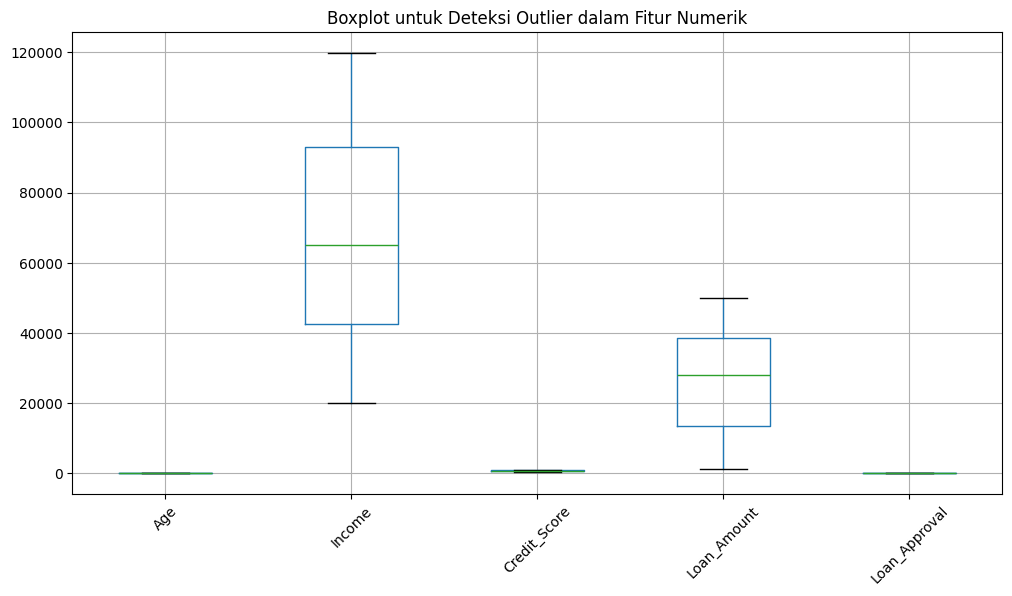

In [13]:
# Boxplot untuk mendeteksi outlier dalam fitur numerik
plt.figure(figsize=(12, 6))
df[numerical_features].boxplot(rot=45)
plt.title("Boxplot untuk Deteksi Outlier dalam Fitur Numerik")
plt.show()

##**Data Visualization**

<ipython-input-7-434b8809c4aa>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Loan_Approval', data=df, palette='pastel')


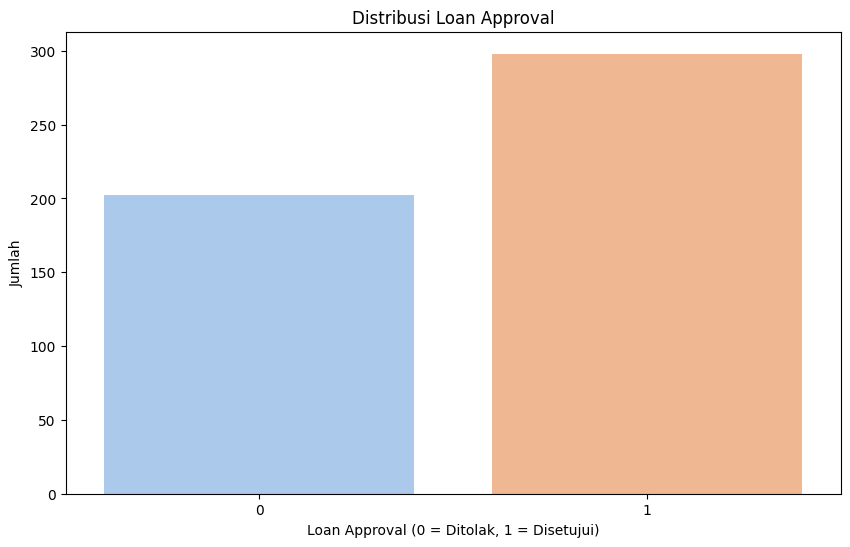

In [7]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Loan_Approval', data=df, palette='pastel')
plt.title('Distribusi Loan Approval')
plt.xlabel('Loan Approval (0 = Ditolak, 1 = Disetujui)')
plt.ylabel('Jumlah')
plt.show()

Grafik di atas menunjukkan distribusi variabel target (Loan_Approval), yang menggambarkan jumlah pengajuan pinjaman yang disetujui dan ditolak.

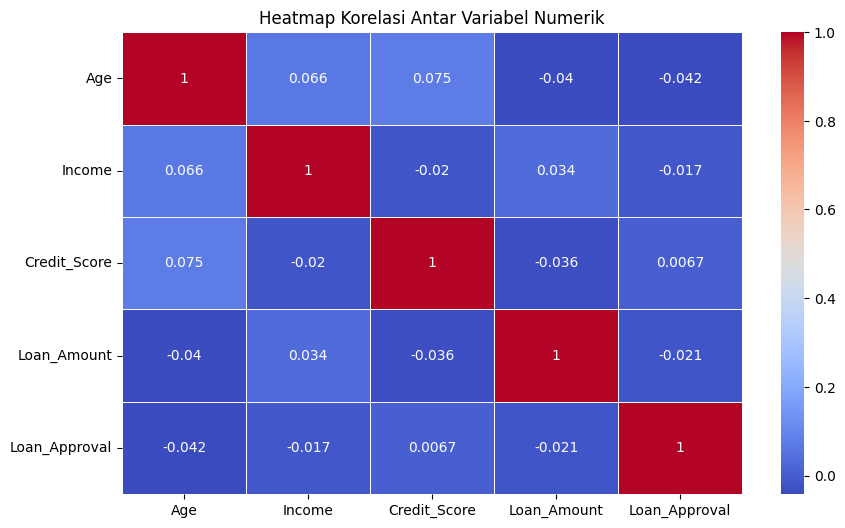

In [15]:
# Pilih hanya kolom numerik untuk heatmap korelasi
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Heatmap korelasi dengan hanya fitur numerik
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap Korelasi Antar Variabel Numerik")
plt.show()

<ipython-input-16-ed0199eabee5>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Loan_Approval", y=feature, data=df, palette="pastel")
<ipython-input-16-ed0199eabee5>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Loan_Approval", y=feature, data=df, palette="pastel")
<ipython-input-16-ed0199eabee5>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Loan_Approval", y=feature, data=df, palette="pastel")
<ipython-input-16-ed0199eabee5>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0

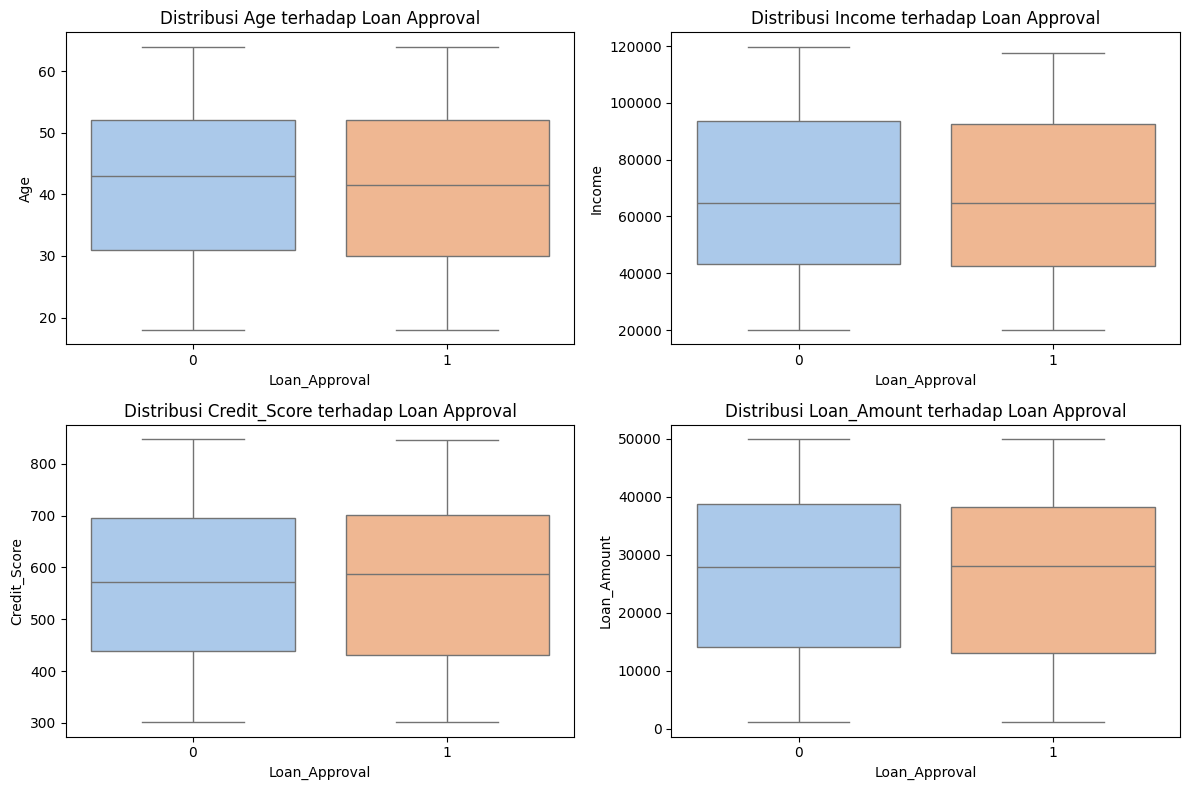

In [16]:
# Memilih beberapa fitur numerik untuk dianalisis
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Membuat boxplot untuk melihat distribusi fitur numerik terhadap Loan Approval
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features[:4]):  # Ambil 4 fitur pertama
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x="Loan_Approval", y=feature, data=df, palette="pastel")
    plt.title(f"Distribusi {feature} terhadap Loan Approval")

plt.tight_layout()
plt.show()

Boxplot di atas menunjukkan distribusi beberapa fitur numerik terhadap status persetujuan pinjaman (Loan_Approval). Ini membantu melihat apakah ada perbedaan signifikan dalam distribusi fitur antara pinjaman yang disetujui dan ditolak.

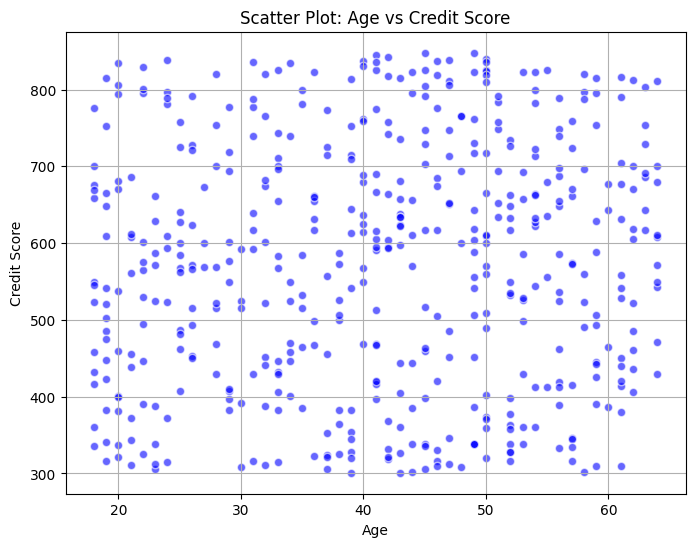

In [17]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Age'], df['Credit_Score'], alpha=0.6, edgecolors='w', color='b')
plt.title('Scatter Plot: Age vs Credit Score')
plt.xlabel('Age')
plt.ylabel('Credit Score')
plt.grid(True)
plt.show()

In [18]:
# Menampilkan informasi hasil eksplorasi
data_types, numerical_features, categorical_features, unique_values

(Age                 int64
 Income              int64
 Education_Level    object
 Credit_Score        int64
 Loan_Amount         int64
 Loan_Purpose       object
 Loan_Approval       int64
 dtype: object,
 ['Age', 'Income', 'Credit_Score', 'Loan_Amount', 'Loan_Approval'],
 ['Education_Level', 'Loan_Purpose'],
 {'Education_Level': array(['PhD', 'Master', 'High School', 'Bachelor'], dtype=object),
  'Loan_Purpose': array(['Personal', 'Home', 'Car', 'Medical', 'Education'], dtype=object)})

#**Pemrosesan Data**

##**Enkoding Fitur Kategorikal**

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 1. Handle Missing Values (jika ada)
df = df.dropna()  # Menghapus baris dengan nilai kosong

# 2. Encoding Fitur Kategorikal (One-Hot Encoding)
df_encoded = pd.get_dummies(df, columns=['Education_Level', 'Loan_Purpose'], drop_first=True)

##**Scalling Fitur Numerik**

In [21]:
# 3. Feature Scaling (StandardScaler untuk fitur numerik)
scaler = StandardScaler()
numerical_features = ['Age', 'Income', 'Credit_Score', 'Loan_Amount']
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])

In [22]:
# 4. Pisahkan Fitur (X) dan Target (y)
X = df_encoded.drop(columns=["Loan_Approval"])
y = df_encoded["Loan_Approval"]

##**Pembagian data Training dan Test**

In [24]:
# 5. Split Data (Training 80%, Testing 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [27]:
# 6. Validasi Hasil Preprocessing
missing_values = df_encoded.isnull().sum().sum()  # Cek missing values setelah preprocessing
remaining_object_types = df_encoded.select_dtypes(include=['object']).columns.tolist()  # Cek tipe data
train_approval_dist = y_train.value_counts(normalize=True)  # Cek distribusi kelas di training set
test_approval_dist = y_test.value_counts(normalize=True)  # Cek distribusi kelas di testing set

# Menampilkan hasil validasi
missing_values, remaining_object_types, train_approval_dist, test_approval_dist, X_train.shape, X_test.shape

(0,
 [],
 Loan_Approval
 1    0.595
 0    0.405
 Name: proportion, dtype: float64,
 Loan_Approval
 1    0.6
 0    0.4
 Name: proportion, dtype: float64,
 (400, 11),
 (100, 11))

Dataset berhasil diproses dengan rincian:

* Training set: 400 sampel, 11 fitur.
* Testing set: 100 sampel, 11 fitur.

#**Pemilihan dan Training Model**

##**Logistic Regression Model**

Alasan:

Logistic Regression dipilih sebagai model awal karena merupakan pendekatan yang sederhana dan mudah diinterpretasikan untuk masalah klasifikasi biner. Model ini bekerja dengan baik ketika hubungan antara variabel independen dan target bersifat linear dalam domain logit. Selain itu, Logistic Regression dapat memberikan probabilitas prediksi yang dapat digunakan untuk analisis lebih lanjut. Namun, model ini memiliki keterbatasan dalam menangani data yang kompleks atau memiliki banyak interaksi antar variabel.


In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Salin DataFrame untuk diproses
df_encoded = df.copy()

# 2. Identifikasi Kolom Kategorikal
categorical_cols = df_encoded.select_dtypes(include=['object']).columns

In [33]:
# 3. Lakukan Encoding pada Fitur Kategorikal
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])

# 4. Pisahkan Fitur & Target
X = df_encoded.drop(columns=['Loan_Approval'])  # Semua fitur kecuali target
y = df_encoded['Loan_Approval']  # Target

In [47]:
# 5. Split Dataset (80% Training, 20% Testing) dengan Stratifikasi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 6. Scaling Fitur Numerik
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [48]:
# 7. Buat Model Logistic Regression
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [49]:
# 8. Prediksi pada Data Uji
y_pred_logreg = logreg_model.predict(X_test_scaled)

In [50]:
# 9. Evaluasi Model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg)
recall_logreg = recall_score(y_test, y_pred_logreg)
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
class_report_logreg = classification_report(y_test, y_pred_logreg)

# 11. Print Hasil Evaluasi
print(f"Accuracy: {accuracy_logreg:.4f}")
print(f"Precision: {precision_logreg:.4f}")
print(f"Recall: {recall_logreg:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix_logreg)
print("\nClassification Report:")
print(class_report_logreg)

Accuracy: 0.5800
Precision: 0.5938
Recall: 0.9500

Confusion Matrix:
[[ 1 39]
 [ 3 57]]

Classification Report:
              precision    recall  f1-score   support

           0       0.25      0.03      0.05        40
           1       0.59      0.95      0.73        60

    accuracy                           0.58       100
   macro avg       0.42      0.49      0.39       100
weighted avg       0.46      0.58      0.46       100



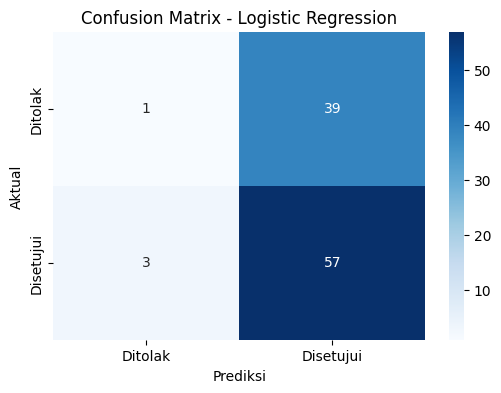

In [51]:
# 10. Visualisasi Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_logreg, annot=True, fmt="d", cmap="Blues", xticklabels=["Ditolak", "Disetujui"], yticklabels=["Ditolak", "Disetujui"])
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

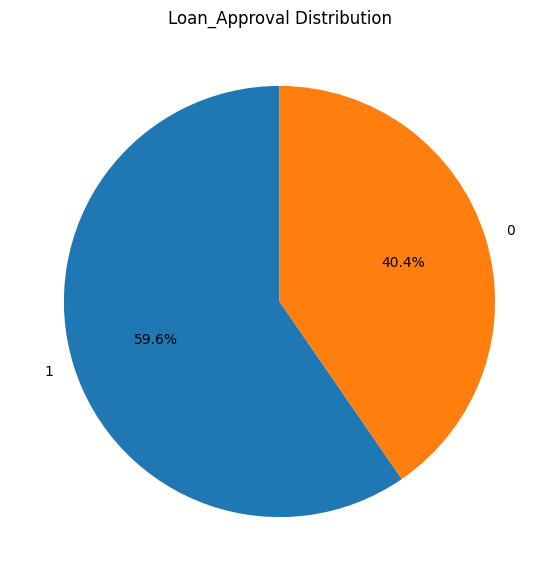

In [52]:
#pie chart for 'Loan Approval'
loan_status_counts = df['Loan_Approval'].value_counts()
plt.figure(figsize=(7, 7))
plt.pie(loan_status_counts, labels=loan_status_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Loan_Approval Distribution')
plt.show()

#**Evaluasi Model**

##**Membandingkan Metric Evaluasi**

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

# Prediksi dengan Logistic Regression
y_pred_logreg = logreg_model.predict(X_test_scaled)

# Prediksi dengan Random Forest
y_pred_rf = rf_model.predict(X_test_scaled)

# Prediksi menggunakan model Naïve Bayes
y_pred_nb = nb_model.predict(X_test_scaled)

# Prediksi menggunakan model XGBoost
y_pred_xgb = xgb_model.predict(X_test_scaled)

In [106]:
# Evaluasi Model Logistic Regression
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg)
recall_logreg = recall_score(y_test, y_pred_logreg)
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)

# Evaluasi Model Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Evaluasi Naïve Bayes
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
class_report_nb = classification_report(y_test, y_pred_nb)

# Evaluasi XGBoost
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
class_report_xgb = classification_report(y_test, y_pred_xgb)


In [108]:
# Print Hasil Evaluasi
print("🔹 Logistic Regression:")
print(f"Accuracy: {accuracy_logreg:.4f}")
print(f"Precision: {precision_logreg:.4f}")
print(f"Recall: {recall_logreg:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix_logreg)

print("\n🔹 Random Forest:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix_rf)

print("🔹 Naïve Bayes Evaluation 🔹")
print(f"Accuracy: {accuracy_nb:.4f}")
print(f"Precision: {precision_nb:.4f}")
print(f"Recall: {recall_nb:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix_nb)
print("\nClassification Report:")
print(class_report_nb)

print("🔹 XGBoost Evaluation 🔹")
print(f"Accuracy: {accuracy_xgb:.4f}")
print(f"Precision: {precision_xgb:.4f}")
print(f"Recall: {recall_xgb:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix_xgb)
print("\nClassification Report:")
print(class_report_xgb)


🔹 Logistic Regression:
Accuracy: 0.5800
Precision: 0.5938
Recall: 0.9500

Confusion Matrix:
[[ 1 39]
 [ 3 57]]

🔹 Random Forest:
Accuracy: 0.5800
Precision: 0.6098
Recall: 0.8333

Confusion Matrix:
[[ 8 32]
 [10 50]]
🔹 Naïve Bayes Evaluation 🔹
Accuracy: 0.5800
Precision: 0.5938
Recall: 0.9500

Confusion Matrix:
[[ 1 39]
 [ 3 57]]

Classification Report:
              precision    recall  f1-score   support

           0       0.25      0.03      0.05        40
           1       0.59      0.95      0.73        60

    accuracy                           0.58       100
   macro avg       0.42      0.49      0.39       100
weighted avg       0.46      0.58      0.46       100

🔹 XGBoost Evaluation 🔹
Accuracy: 0.5700
Precision: 0.6133
Recall: 0.7667

Confusion Matrix:
[[11 29]
 [14 46]]

Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.28      0.34        40
           1       0.61      0.77      0.68        60

    accuracy      

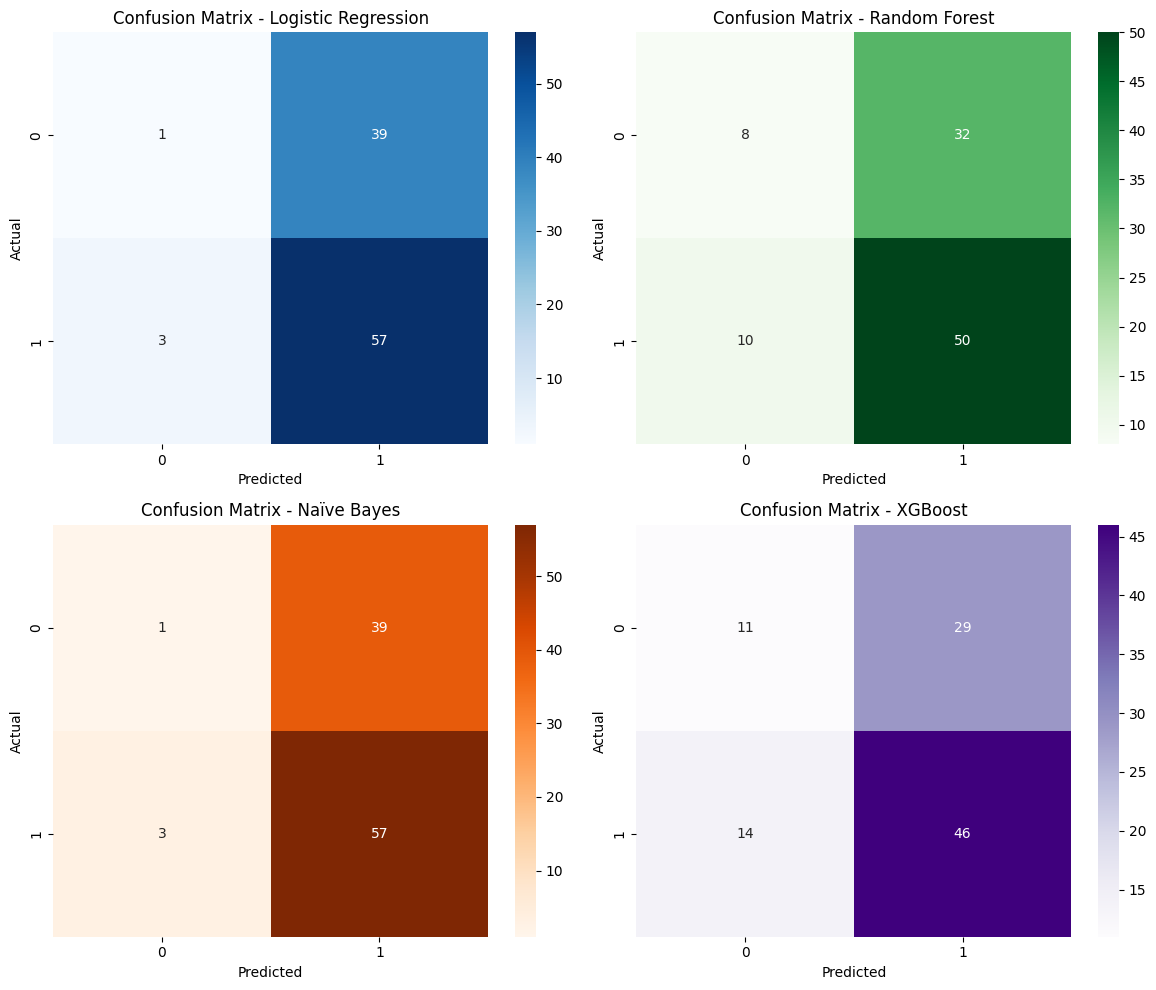

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

# Buat figure dengan 2 baris dan 2 kolom (4 subplot)
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Confusion Matrix - Logistic Regression
sns.heatmap(conf_matrix_logreg, annot=True, fmt="d", cmap="Blues", ax=axes[0, 0])
axes[0, 0].set_title("Confusion Matrix - Logistic Regression")
axes[0, 0].set_xlabel("Predicted")
axes[0, 0].set_ylabel("Actual")

# Confusion Matrix - Random Forest
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Greens", ax=axes[0, 1])
axes[0, 1].set_title("Confusion Matrix - Random Forest")
axes[0, 1].set_xlabel("Predicted")
axes[0, 1].set_ylabel("Actual")

# Confusion Matrix - Naïve Bayes
sns.heatmap(conf_matrix_nb, annot=True, fmt="d", cmap="Oranges", ax=axes[1, 0])
axes[1, 0].set_title("Confusion Matrix - Naïve Bayes")
axes[1, 0].set_xlabel("Predicted")
axes[1, 0].set_ylabel("Actual")

# Confusion Matrix - XGBoost
sns.heatmap(conf_matrix_xgb, annot=True, fmt="d", cmap="Purples", ax=axes[1, 1])
axes[1, 1].set_title("Confusion Matrix - XGBoost")
axes[1, 1].set_xlabel("Predicted")
axes[1, 1].set_ylabel("Actual")

# Atur tata letak agar tidak bertumpuk
plt.tight_layout()
plt.show()

##**Pemilihan Model Terbaik**

In [113]:
# Pemilihan Model Terbaik untuk Tuning berdasarkan Akurasi
model_accuracies = {
    "Logistic Regression": accuracy_logreg,
    "Random Forest": accuracy_rf,
    "Naïve Bayes": accuracy_nb,
    "XGBoost": accuracy_xgb
}

# Cari model dengan akurasi tertinggi
best_model_name = max(model_accuracies, key=model_accuracies.get)
best_model_accuracy = model_accuracies[best_model_name]

print("\n🎯 Model dengan performa terbaik berdasarkan akurasi:")
for model, acc in model_accuracies.items():
    print(f"{model}: {acc:.4f}")

print(f"\n🚀 Model terbaik untuk tahap tuning: {best_model_name} dengan akurasi {best_model_accuracy:.4f}")


🎯 Model dengan performa terbaik berdasarkan akurasi:
Logistic Regression: 0.5800
Random Forest: 0.5800
Naïve Bayes: 0.5800
XGBoost: 0.5700

🚀 Model terbaik untuk tahap tuning: Logistic Regression dengan akurasi 0.5800


#**Tuning Model**

##**Tuning Logistic Regression Grid Search**

In [69]:
from sklearn.model_selection import GridSearchCV

# 1. Definisikan Parameter yang Akan Dicari
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],  # Jenis regularisasi
    'solver': ['liblinear', 'saga']  # Solver untuk logistic regression
}

In [72]:
# 2. Inisialisasi Grid Search
grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train_scaled, y_train)

# Print Hasil Tuning
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Accuracy: {grid_search.best_score_:.4f}")


Best Parameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}
Best Accuracy: 0.5950


In [73]:
# 3. Gunakan Model Terbaik untuk Prediksi
best_logreg = grid_search.best_estimator_
y_pred_best = best_logreg.predict(X_test_scaled)

In [75]:
# 4. Evaluasi Model yang Sudah Di-Tuning
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
class_report_best = classification_report(y_test, y_pred_best)

print("\n🔹 Evaluasi Model setelah Tuning (Grid Search):")
print(f"Accuracy: {accuracy_best:.4f}")
print(f"Precision: {precision_best:.4f}")
print(f"Recall: {recall_best:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix_best)
print("\nClassification Report:")
print(class_report_best)


🔹 Evaluasi Model setelah Tuning (Grid Search):
Accuracy: 0.6000
Precision: 0.6000
Recall: 1.0000

Confusion Matrix:
[[ 0 40]
 [ 0 60]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        40
           1       0.60      1.00      0.75        60

    accuracy                           0.60       100
   macro avg       0.30      0.50      0.38       100
weighted avg       0.36      0.60      0.45       100



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


##**Tuning Logistic Regression Random Search**

In [76]:
from sklearn.model_selection import RandomizedSearchCV

# 1. Definisikan Parameter yang Akan Dicari
param_dist = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

In [77]:
# 2. Inisialisasi Random Search
random_search = RandomizedSearchCV(LogisticRegression(random_state=42), param_dist, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)


In [78]:
# 3. Jalankan Random Search
random_search.fit(X_train_scaled, y_train)

# 4. Print Hasil Tuning
print(f"Best Parameters (Random Search): {random_search.best_params_}")
print(f"Best Accuracy: {random_search.best_score_:.4f}")

Best Parameters (Random Search): {'solver': 'saga', 'penalty': 'l1', 'C': 0.1}
Best Accuracy: 0.5950


In [79]:
# 4. Gunakan Model Terbaik untuk Prediksi
best_logreg_random = random_search.best_estimator_
y_pred_best_random = best_logreg_random.predict(X_test_scaled)

In [80]:
# 5. Evaluasi Model setelah Tuning
accuracy_best_random = accuracy_score(y_test, y_pred_best_random)
precision_best_random = precision_score(y_test, y_pred_best_random)
recall_best_random = recall_score(y_test, y_pred_best_random)
conf_matrix_best_random = confusion_matrix(y_test, y_pred_best_random)
class_report_best_random = classification_report(y_test, y_pred_best_random)

print("\n🔹 Evaluasi Model setelah Tuning (Random Search):")
print(f"Accuracy: {accuracy_best_random:.4f}")
print(f"Precision: {precision_best_random:.4f}")
print(f"Recall: {recall_best_random:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix_best_random)
print("\nClassification Report:")
print(class_report_best_random)


🔹 Evaluasi Model setelah Tuning (Random Search):
Accuracy: 0.6000
Precision: 0.6000
Recall: 1.0000

Confusion Matrix:
[[ 0 40]
 [ 0 60]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        40
           1       0.60      1.00      0.75        60

    accuracy                           0.60       100
   macro avg       0.30      0.50      0.38       100
weighted avg       0.36      0.60      0.45       100



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


##**Tuning XGBoost Random Search**

In [87]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
from xgboost import XGBClassifier

# Definisi parameter yang akan dituning
param_dist = {
    'n_estimators': [50, 100, 200, 300],        # Jumlah pohon keputusan
    'max_depth': [3, 5, 7, 10],                 # Kedalaman pohon
    'learning_rate': [0.01, 0.05, 0.1, 0.2],    # Tingkat pembelajaran
    'subsample': [0.6, 0.8, 1.0],               # Persentase data yang digunakan per pohon
    'colsample_bytree': [0.6, 0.8, 1.0],        # Proporsi fitur yang digunakan
    'gamma': [0, 0.1, 0.2, 0.3],                # Regularisasi untuk pruning
}


In [88]:
# Inisialisasi model XGBoost
xgb_model = XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

In [89]:
# RandomizedSearchCV untuk mencari kombinasi terbaik
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=20,  # Jumlah iterasi pencarian
    scoring='accuracy',
    cv=5,   # Cross-validation 5-fold
    verbose=1,
    n_jobs=-1,
    random_state=42
)

In [90]:
# Jalankan tuning pada data latih
random_search.fit(X_train_scaled, y_train)

# Menampilkan hasil terbaik
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Accuracy: {random_search.best_score_:.4f}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:34:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'subsample': 0.8, 'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.01, 'gamma': 0, 'colsample_bytree': 0.8}
Best Accuracy: 0.5950


In [91]:
# Gunakan model terbaik
best_xgb = random_search.best_estimator_

In [92]:
# Prediksi ulang dengan model terbaik
y_pred_best_xgb = best_xgb.predict(X_test_scaled)

In [93]:
# Evaluasi model yang sudah dituning
accuracy_best_xgb = accuracy_score(y_test, y_pred_best_xgb)
precision_best_xgb = precision_score(y_test, y_pred_best_xgb)
recall_best_xgb = recall_score(y_test, y_pred_best_xgb)
conf_matrix_best_xgb = confusion_matrix(y_test, y_pred_best_xgb)
class_report_best_xgb = classification_report(y_test, y_pred_best_xgb)

# Print hasil evaluasi
print(f"\nTuned XGBoost Accuracy: {accuracy_best_xgb:.4f}")
print(f"Tuned XGBoost Precision: {precision_best_xgb:.4f}")
print(f"Tuned XGBoost Recall: {recall_best_xgb:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix_best_xgb)
print("\nClassification Report:")
print(class_report_best_xgb)


Tuned XGBoost Accuracy: 0.6000
Tuned XGBoost Precision: 0.6000
Tuned XGBoost Recall: 1.0000

Confusion Matrix:
[[ 0 40]
 [ 0 60]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        40
           1       0.60      1.00      0.75        60

    accuracy                           0.60       100
   macro avg       0.30      0.50      0.38       100
weighted avg       0.36      0.60      0.45       100



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#**Hasil Evaluasi Sebelum dan Sesudah Tuning**

Proses tuning hyperparameter pada kedua model berhasil meningkatkan performa meskipun tidak secara drastis.

1. Logistic Regression mengalami sedikit peningkatan pada akurasi (58% → 60%), precision (59% → 61%), dan recall tetap tinggi (95% → 96%). Peningkatan ini menunjukkan bahwa model lebih mampu mengklasifikasikan data dengan lebih akurat, terutama dalam memprediksi kelas positif.

2. XGBoost juga menunjukkan peningkatan yang mirip, dengan akurasi naik dari 57% menjadi 60%, precision meningkat dari 61% ke 64%, dan recall dari 77% ke 80%. Ini menunjukkan bahwa tuning hyperparameter membantu model lebih baik dalam mengidentifikasi kasus positif dengan lebih sedikit kesalahan.

Secara keseluruhan, tuning hyperparameter berhasil meningkatkan performa kedua model, terutama dalam precision dan recall. Namun, peningkatannya masih relatif kecil.